# Final Project Group 15

In this notebook we will carry out the experiments to support our research questions.

Group Members:


Andres Garcia - 2646142
Yuanchao Lu - 2700631

## Package Imports

Run the cell below first always!

In [57]:
# Run this cell before anything else to import the packages you are allowed to used for this assignment

import numpy as np
import pandas as pd
import sklearn
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import geopandas as gpd

pd.options.display.max_rows = 20

## Loading the Datasets

In [58]:
#store the data files location
booksdatafile   = 'books_data/books.csv'
ratingsdatafile  = 'books_data/ratings.csv'
usersdatafile = 'books_data/users.csv'

#load the data as dataframes
booksdf = pd.read_csv(booksdatafile, sep=";", 
                    error_bad_lines=False, encoding="latin-1")
booksdf.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True) #remove the columns we wont use

ratingsdf = pd.read_csv(ratingsdatafile, sep=";", 
                    error_bad_lines=False, encoding="latin-1");
usersdf = pd.read_csv(usersdatafile, sep=';', 
                    error_bad_lines=False, encoding="latin-1");

/var/folders/nk/_cwbt2050pv3gbtkghq7_pf00000gn/T/ipykernel_49504/1395339777.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  booksdf = pd.read_csv(booksdatafile, sep=";",
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: exp

### Books Dataset

In [59]:
print(len(booksdf))
booksdf.head(40)

271360


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
35,3442446937,Tage der Unschuld.,Richard North Patterson,2000,Goldmann
36,0375406328,Lying Awake,Mark Salzman,2000,Alfred A. Knopf
37,0446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown &amp; Company
38,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,2002,Ballantine Books


### Users Dataset

In [60]:
print(len(usersdf))
usersdf.head()

278858


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Ratings Dataset

In [61]:
print(len(ratingsdf))
ratingsdf.head()

1149780


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Merging the frames
In order to avoid some calculations all over the dataframes provided, we instead can merge them toguether since the three dataframes are connected through the user-id and the ISBN columns. This way it will be much easier to query the merged frame for information.

In [62]:
merge_rating_books = pd.merge(ratingsdf, booksdf, on='ISBN')
finaldf = pd.merge(merge_rating_books, usersdf, on='User-ID')
finaldf.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


# Exploratory Data Analysis
In this section we will carry out all the statistical data analysis in order to obtain valuable data to support or inspire our research questions

In [63]:
#helper functions

def graph_col_dist(data):
    
        # Plot the histogram
    plt.figure(figsize=(8, 6))
    data.plot(kind='hist', bins=10, density=True, alpha=0.7, color='blue')

    # Calculate the parameters for the normal distribution curve
    mu, sigma = np.mean(data), np.std(data)

    # Plot the normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, color='red', linewidth=2)

    # Set the labels and title
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Distribution of Ratings')

    # Show the plot
    plt.show()
    
def graph_outliers(data):
    
    data.value_counts().plot(kind='box', figsize=(6, 8), title= "Outlier Analysis")
    plt.show()

### Book Ratings Distribution

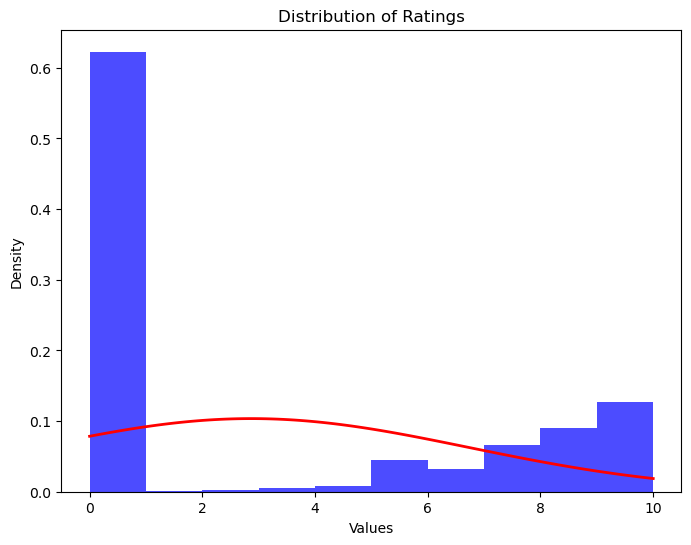

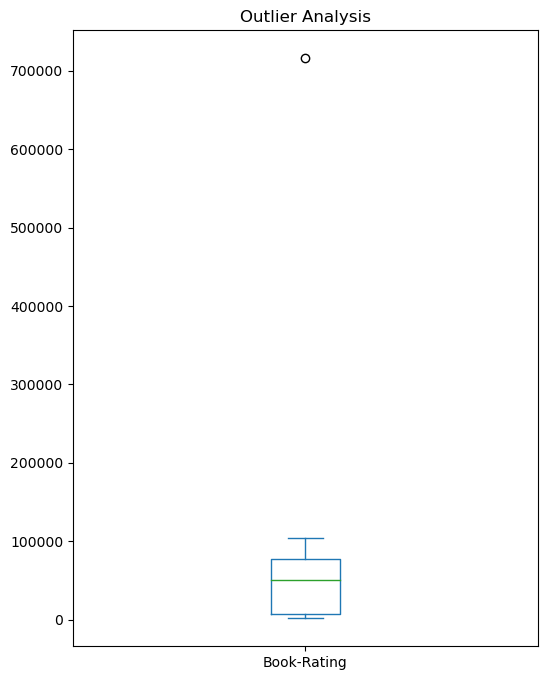

In [64]:
# Select the column from the dataframe
column_data = ratingsdf['Book-Rating']
graph_col_dist(column_data)
graph_outliers(column_data)

## User Location 

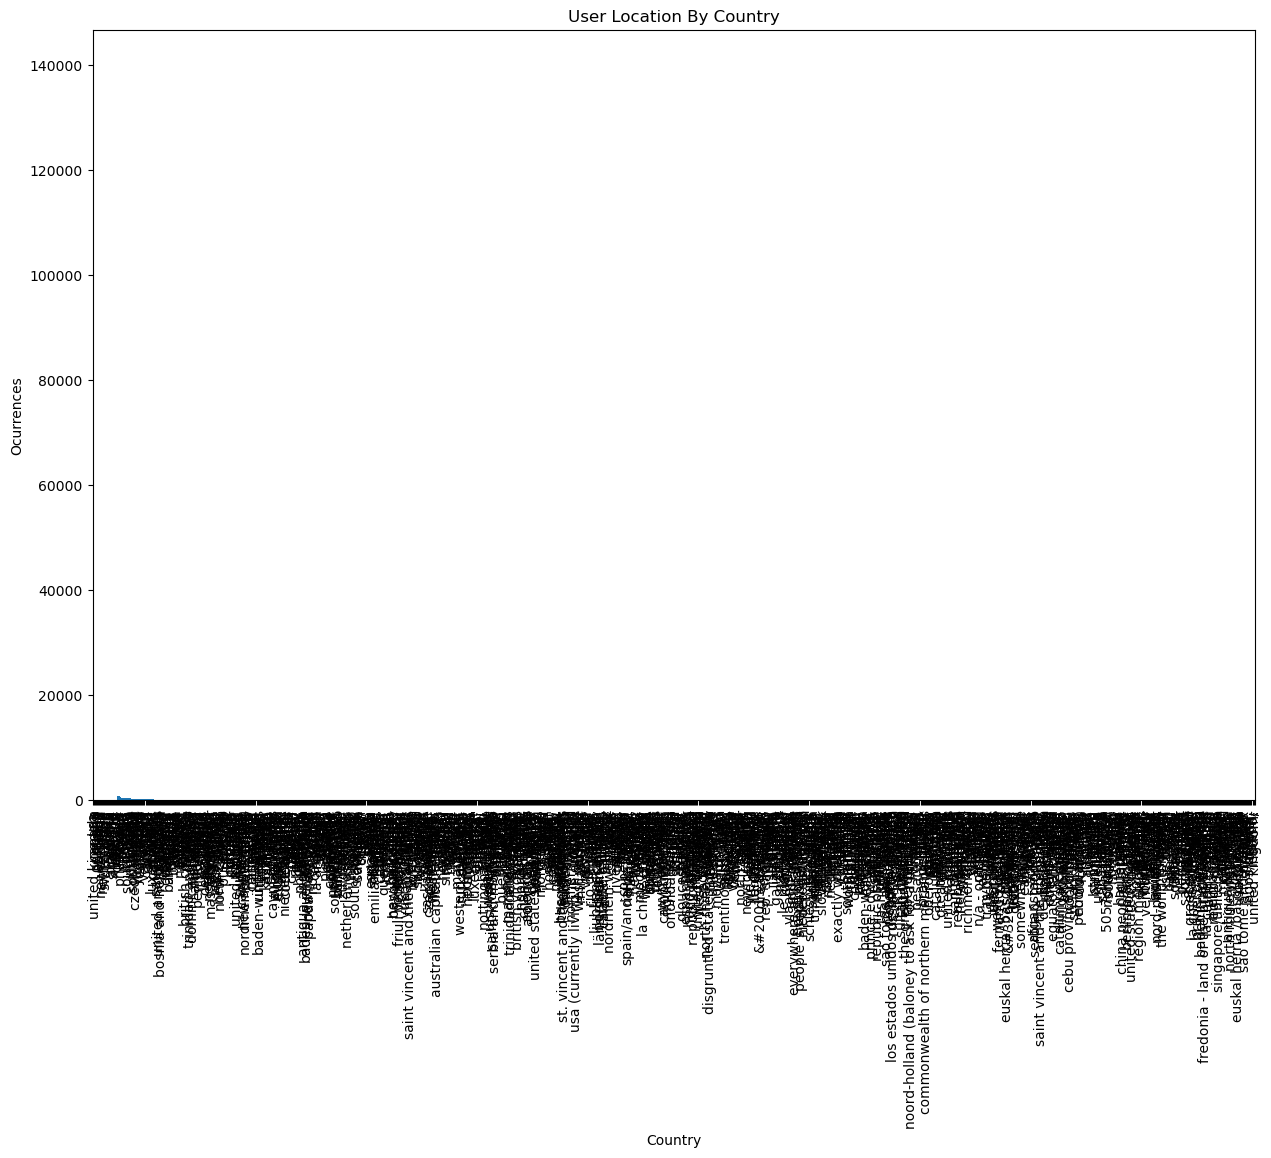

In [65]:
# Extract the country from the 'Location' column
usersdf['Country'] = usersdf['Location'].apply(lambda x: x.split(', ')[-1])
usersdf['Country'].value_counts().plot(kind='bar', figsize=(15, 10), rot=90, xlabel = "Country", ylabel = "Ocurrences", title= "User Location By Country")
plt.show()

In [66]:
# Create a mapping dictionary for country names
country_mapping = {
    'usa': 'United States of America',
    # Add more country mappings as needed
}

# Function to update country names
def update_country_name(country):
    # Check if the country is in the mapping dictionary
    if country.lower() in country_mapping:
        return country_mapping[country.lower()]
    else:
        # Capitalize the first letter of the country name
        return country.capitalize()

# Apply the update_country_name function to the 'Country' column
usersdf['Country'] = usersdf['Country'].apply(update_country_name)

/Users/luyuanchao/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


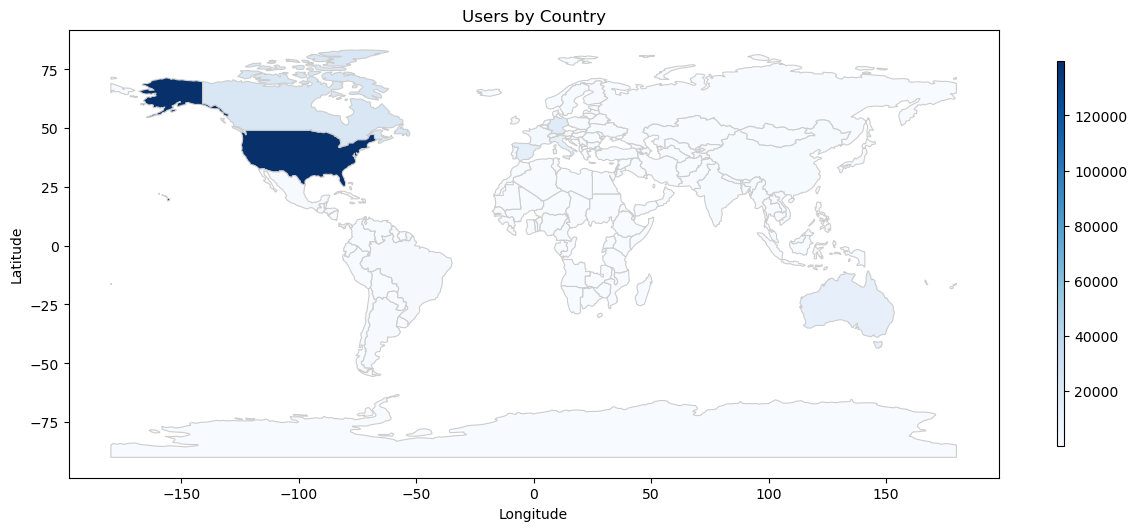

In [67]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


# Group the users by country and calculate the count
users_by_country = usersdf.groupby('Country')['User-ID'].count().reset_index()

# Merge the user count with the world map data
world = world.merge(users_by_country, left_on='name', right_on='Country', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='User-ID', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
           legend_kwds={'shrink': 0.5, 'aspect': 50})

# Set plot title and labels
plt.title('Users by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


## User Age Distribution

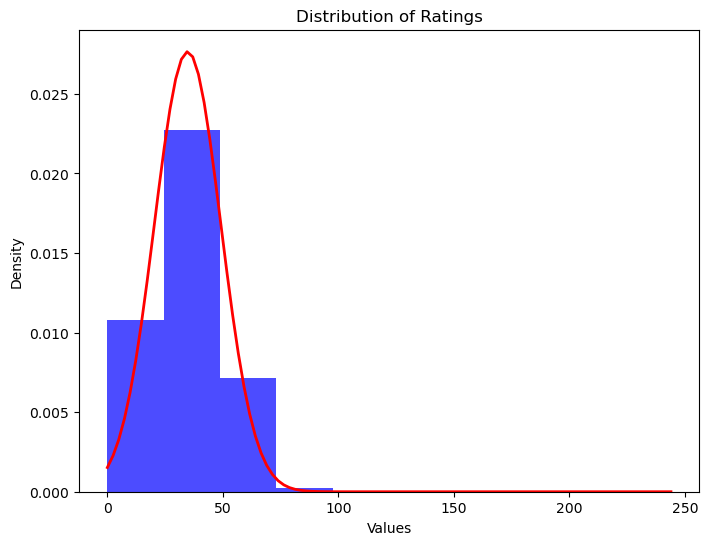

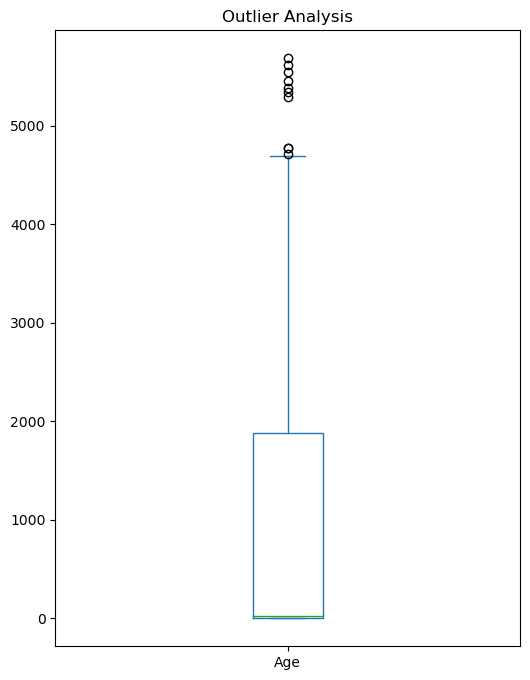

In [68]:
# Select the column from the dataframe
column_data = usersdf['Age']
graph_col_dist(column_data)
graph_outliers(column_data)

# Data Cleaning

### Cleaning the Ratings

There is far too many 0 ratings, we will assume these are users that simply did not leave a rating and thus the book was assigned a 0, otherwise any analysis and algorithms will have a heavily overrepresented value.

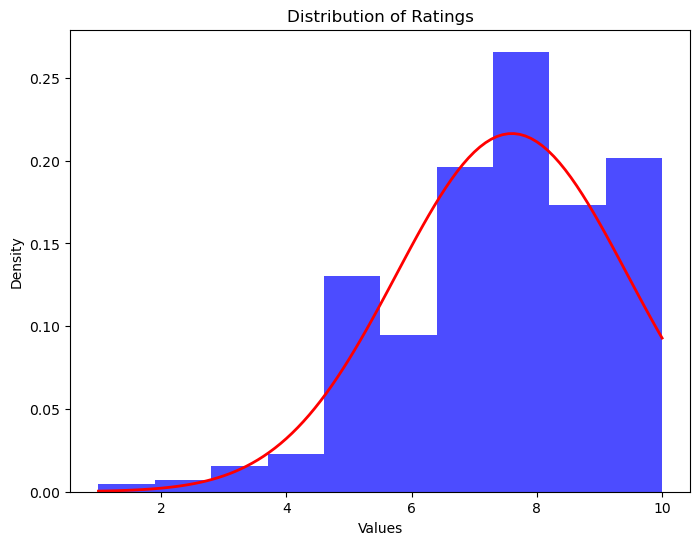

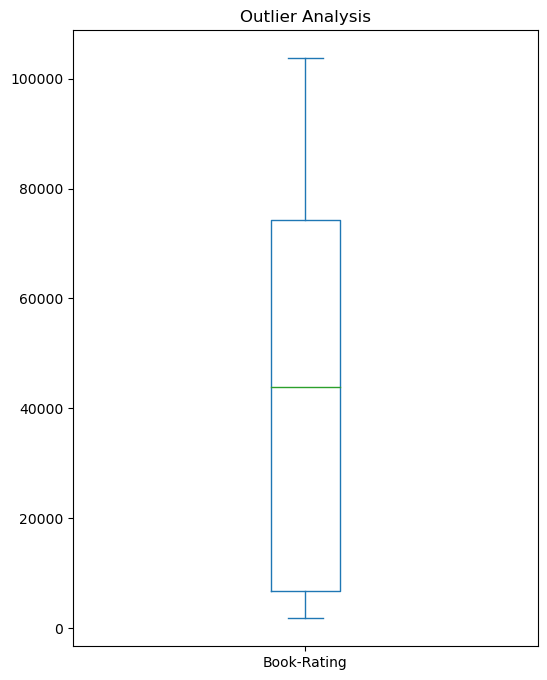

In [69]:
ratingsdf = ratingsdf[ratingsdf['Book-Rating'] != 0]
column_data = ratingsdf['Book-Rating']
graph_col_dist(column_data)
graph_outliers(column_data)

## Clean the Users Dataframe

It is clear from the basic analysys that there are heavy outliers and also NAN and empty values values. We remove all users outside the USA and add the new columns city and location, where location is the state.

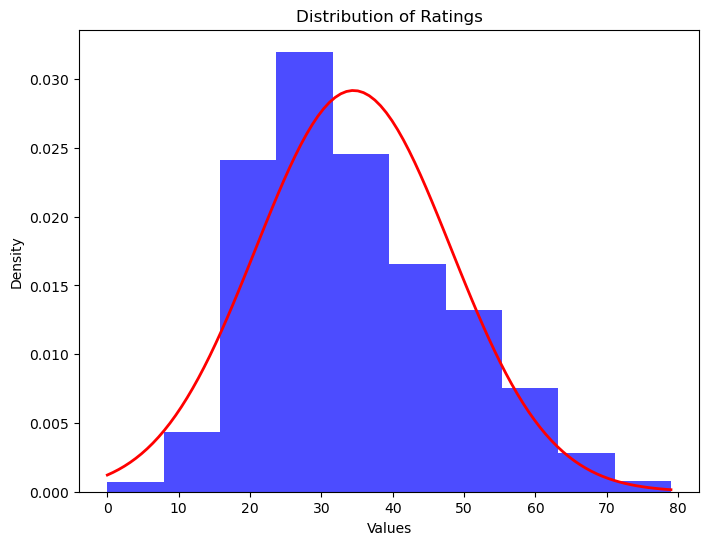

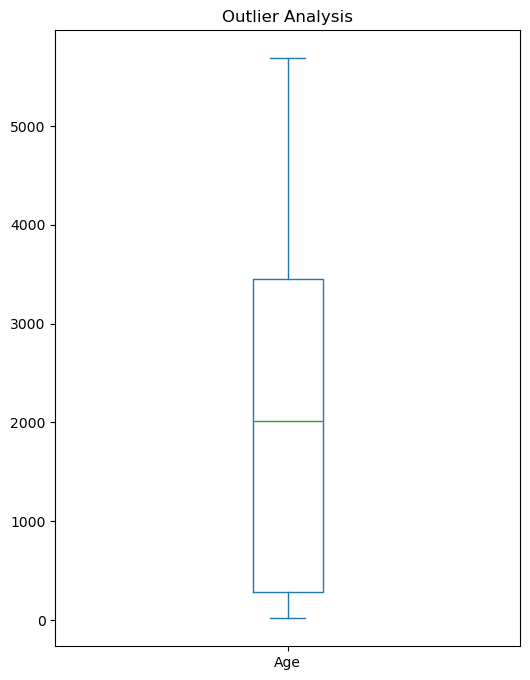

In [70]:
usersdf = usersdf[usersdf['Age'] < 80]
usersdf = usersdf[usersdf['Location'] != '']
usersdf.dropna(subset=['Location'], inplace=True)
usersdf['Country'] = usersdf['Location'].apply(lambda x: x.split(', ')[-1])


# Select the column from the dataframe
column_data = usersdf['Age']
graph_col_dist(column_data)
graph_outliers(column_data)

In [71]:
usersdf = usersdf[usersdf['Country'] == 'usa']
usersdf = usersdf.drop(['Country'], axis=1)
usersdf['City'] = usersdf['Location'].apply(lambda x: x.split(',')[0])
usersdf['Location'] = usersdf['Location'].apply(lambda x: x.split(', ')[1])
usersdf.head(5)

,User-ID,Location,Age,City
1,2,california,18.0,stockton
5,6,california,61.0,santa monica
19,20,pennsylvania,19.0,langhorne
24,25,california,55.0,oakland
26,27,illinois,32.0,chicago


## Clean Books Dataframe
Remove books without publication date or 0

In [72]:
booksdf = booksdf[booksdf['Year-Of-Publication'] != 0]
booksdf.dropna(subset=['Year-Of-Publication'], inplace=True)
booksdf.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


## Merged df From Cleaned Frames

Now we remerge the df with the cleaned subsets.

In [73]:
merge_rating_books = pd.merge(ratingsdf, booksdf, on='ISBN')
finaldf = pd.merge(merge_rating_books, usersdf, on='User-ID')
finaldf.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,City
0,16877,038550120X,9,A Painted House,JOHN GRISHAM,2001,Doubleday,arkansas,37.0,houston
1,16877,034539657X,7,Dark Rivers of the Heart,Dean R. Koontz,1995,Ballantine Books,arkansas,37.0,houston
2,16877,0743211383,3,Dreamcatcher,Stephen King,2001,Scribner,arkansas,37.0,houston
3,16877,0786868716,10,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,arkansas,37.0,houston
4,16877,0440159016,10,Motherhood: The Second Oldest Profession,Erma Bombeck,1987,Dell,arkansas,37.0,houston


## General Statistics after Cleaning

In [77]:
mean_book_rating = ratingsdf["Book-Rating"].mean()
std_book_rating = ratingsdf["Book-Rating"].std()
mean_user_age = usersdf["Age"].mean()
print("Amount of Users:", len(usersdf))
print("Amount of Books:", len(booksdf))

print("Average book rating:", mean_book_rating)
print("STD of book rating:", std_book_rating)
print("Average User Age:", mean_user_age)

Amount of Users: 76230
Amount of Books: 267790
Average book rating: 7.601066246071331
STD of book rating: 1.8437976309990336
Average User Age: 37.686868686868685


### Highest Rated Author

In [78]:
mean_author_ratings = finaldf.groupby(['Book-Author'])['Book-Rating'].mean()
highest_rated_author = mean_author_ratings.idxmax()
print("Author with the highest average book ratings:", highest_rated_author)

Author with the highest average book ratings:  D. Chiel


### Highest Rated Publisher

In [79]:
mean_pub_ratings = finaldf.groupby(['Publisher'])['Book-Rating'].mean()
highest_rated_pub = mean_pub_ratings.idxmax()
print("Publisher with the highest average book ratings:", highest_rated_pub)

Publisher with the highest average book ratings: 101 Productions; [distributed by Scribner, New York]


### Top Rated Books

In [80]:
#extract first the book ratings
mean_book_ratings = finaldf.groupby(['Book-Title'])['Book-Rating'].mean()
count_book_ratings = finaldf.groupby(['Book-Title'])['Book-Rating'].count()
book_ratings = pd.DataFrame({'Mean-Rating': mean_book_ratings, 'Rating-Count': count_book_ratings})

#make sure the books have at least 100 ratings, otherwise the top rated book can be a book with just one 10 star rating
filtered_books = book_ratings[book_ratings['Rating-Count'] >= 100]
sorted_books = filtered_books.sort_values(by='Mean-Rating', ascending=False)
top_rated_books = sorted_books.head(10)


print("-----------------------------------------------------Top 10 Rated Books--------------------------------------------------")
i = 1
for title, row in top_rated_books.iterrows():
    print("Nr. " + str(i) + " - " + title)
    i += 1


-----------------------------------------------------Top 10 Rated Books--------------------------------------------------
Nr. 1 - Harry Potter and the Goblet of Fire (Book 4)
Nr. 2 - Harry Potter and the Prisoner of Azkaban (Book 3)
Nr. 3 - Harry Potter and the Sorcerer's Stone (Book 1)
Nr. 4 - Harry Potter and the Order of the Phoenix (Book 5)
Nr. 5 - The Fellowship of the Ring (The Lord of the Rings, Part 1)
Nr. 6 - Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Nr. 7 - To Kill a Mockingbird
Nr. 8 - Harry Potter and the Chamber of Secrets (Book 2)
Nr. 9 - Fahrenheit 451
Nr. 10 - Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson


### Highest Rated Books by Users Who Dislike The Top Rated Book

In [81]:
#we define an user disliking a book if it rated it 5 or below
users_disliked_top = merge_rating_books[(merge_rating_books['Book-Title'] == 'Harry Potter and the Prisoner of Azkaban (Book 3)') & (merge_rating_books['Book-Rating'] <= 5)]
id_list = users_disliked_top['User-ID'].unique()
filtered_df = merge_rating_books[merge_rating_books['User-ID'].isin(id_list)]

#remove the book since it could be returned as the most liked book
filtered_df = filtered_df[filtered_df['Book-Title'] != 'Harry Potter and the Prisoner of Azkaban (Book 3)']
pop = filtered_df['Book-Title'].value_counts()
most_pop = pop.idxmax()

print("The most liked book by users who disliked the top reated book is: " + most_pop)

The most liked book by users who disliked the top reated book is: Harry Potter and the Chamber of Secrets (Book 2)


### Top Rated Book by Decade (of the last 5 Decades)

In [82]:
# First, we convert the 'Year-Of-Publication' column to integers
merge_rating_books['Year-Of-Publication'] = pd.to_numeric(merge_rating_books['Year-Of-Publication'], errors='coerce')

# Then, we drop the rows with invalid 'Year-Of-Publication' values
merge_rating_books.dropna(subset=['Year-Of-Publication'], inplace=True)

# Now, we can find the valid books and check the boundaries for the range of decades
valid_years = merge_rating_books[
    (merge_rating_books['Year-Of-Publication'] >= 1970) & 
    (merge_rating_books['Year-Of-Publication'] <= pd.Timestamp.now().year)
]

# Oldest published book from the 70s
oldest_book = valid_years.loc[valid_years['Year-Of-Publication'].idxmin()]
oldest_book_title = oldest_book['Book-Title']
oldest_book_year = oldest_book['Year-Of-Publication']

# Most recent book until present
most_recent_book = valid_years.loc[valid_years['Year-Of-Publication'].idxmax()]
most_recent_book_title = most_recent_book['Book-Title']
most_recent_book_year = most_recent_book['Year-Of-Publication']

print("Oldest Published Book: " + oldest_book_title + " (" + str(int(oldest_book_year)) + ")")
print("Most Recent Book: " + most_recent_book_title + " (" + str(int(most_recent_book_year)) + ")")

Oldest Published Book: Principles of Lower-Extremity Bracing (1970)
Most Recent Book: Heidi (2021)


In [83]:
#filter the dataframe to books in the last 5 decades
filtered_df = merge_rating_books[(merge_rating_books['Year-Of-Publication'] >= 1980) & (merge_rating_books['Year-Of-Publication'] <= 2023)].copy()
book_ratings_count = filtered_df['Book-Title'].value_counts()


#add a decade column so we can then calculate the mena ratings
filtered_df['Decade'] = (filtered_df['Year-Of-Publication'] // 10) * 10
grouped_df = filtered_df.groupby(['Decade', 'Book-Title'])['Book-Rating'].mean().reset_index()
sorted_df = grouped_df.sort_values(['Decade', 'Book-Rating'], ascending=[False, False])


decades = sorted_df['Decade'].unique()[-5:] 
for decade in decades:
    books_in_decade = sorted_df[sorted_df['Decade'] == decade]
    highest_rated_book = books_in_decade.iloc[0]
    print("Decade:", round(decade))
    print("Highest Rated Book:", highest_rated_book['Book-Title'])
    print("Average Rating:", highest_rated_book['Book-Rating'])
    print()


Decade: 2020
Highest Rated Book: Edgar Allen Poe Collected Poems
Average Rating: 8.0

Decade: 2010
Highest Rated Book: Deep Waters
Average Rating: 9.0

Decade: 2000
Highest Rated Book:  Dark Justice
Average Rating: 10.0

Decade: 1990
Highest Rated Book:  Final Fantasy Anthology: Official Strategy Guide (Brady Games)
Average Rating: 10.0

Decade: 1980
Highest Rated Book: 1,001 Things Everyone Should Know About American History
Average Rating: 10.0



### Average Book Rating per  Publication Decade (Last 5 Decades)

In [84]:
#extract ratings for each book and add column for decade
book_ratings_count = filtered_df['Book-Title'].value_counts()
filtered_df['Decade'] = (filtered_df['Year-Of-Publication'] // 10) * 10

#filter dataframe by decade and extract mean ratings of las 5
grouped_df = filtered_df.groupby('Decade')['Book-Rating'].mean()
decades = grouped_df.index[-5:] 
for decade in decades:
    average_rating = grouped_df.loc[decade]
    print("Decade:", round(decade))
    print("Average Rating:", average_rating)
    print()


Decade: 1980
Average Rating: 7.659477290027912

Decade: 1990
Average Rating: 7.580945932446082

Decade: 2000
Average Rating: 7.658197475915361

Decade: 2010
Average Rating: 8.333333333333334

Decade: 2020
Average Rating: 7.8



# Users Age Data Statistical Analysis

## Users Age Demographics

In [85]:
#declare the age groups
children_to = 13
teenager_to = 18
adult_to = 65

In [86]:
#extract the age groups
children_users = usersdf[usersdf['Age'] < children_to]
teeneager_users = usersdf[(usersdf['Age'] >= children_to) & (usersdf['Age'] < teenager_to)]
adult_users = usersdf[(usersdf['Age'] >= teenager_to) & (usersdf['Age'] < adult_to)]
elder_users = usersdf[usersdf['Age'] >= adult_to]

#save the numbers in variables for graphing
n_children = len(children_users)
n_teeneagers = len(teeneager_users)
n_adults = len(adult_users) 
n_elders = len(elder_users)
total_users = n_children + n_teeneagers + n_adults + n_elders

#print rhe results
print('Amount of Children Users: ' + str(n_children))
print('Amount of Teenager Users: ' + str(n_teeneagers))
print('Amount of Adult Users: ' + str(n_adults))
print('Amount of Elderly Users: ' + str(n_elders))
print('Total Users: ' + str(total_users))

Amount of Children Users: 672
Amount of Teenager Users: 4701
Amount of Adult Users: 67985
Amount of Elderly Users: 2872
Total Users: 76230


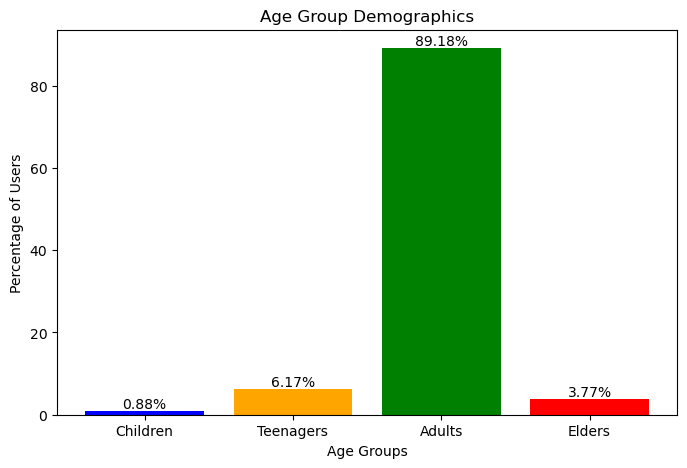

In [87]:
# Define the labels for the age groups
labels_bar = ['Children', 'Teenagers', 'Adults', 'Elders']

# Calculate the percentages for each age group
percentages = [value / total_users * 100 for value in [n_children, n_teeneagers, n_adults, n_elders]]

# Plot the bar graph with percentages
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels_bar, percentages, color=['blue', 'orange', 'green', 'red'], linewidth=1.2)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Percentage of Users')
ax.set_title('Age Group Demographics')

# Add percentage labels to the bars
for i in range(len(percentages)):
    ax.text(x=i, y=percentages[i], s=f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()


## Highest Rated Book by Age Group

In [88]:
#create a copy of the merged df so we dont mees with the original one, always remember to do this in experiments
new_df = finaldf.copy()

#clean the new df
new_df = new_df.dropna(subset=['Age'])
new_df = new_df[new_df['Age'] != 0]

#extract the highest rated book by children
children_ratings = new_df[new_df['Age'] < children_to]
avg_children_ratings = children_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_children = avg_children_ratings.idxmax()

#extract the highest rated book by teenagers
teenager_ratings = new_df[(new_df['Age'] >= children_to) & (new_df['Age'] < teenager_to)]
avg_teenager_ratings = teenager_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_teenager = avg_teenager_ratings.idxmax()

#extract the highest rated book by adults
adult_ratings = new_df[(new_df['Age'] >= teenager_to) & (new_df['Age'] < adult_to)]
avg_adult_ratings = adult_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_adult = avg_adult_ratings.idxmax()

#extract the highest rated book by elders
elder_ratings = new_df[new_df['Age'] >= adult_to]
avg_elder_ratings = elder_ratings.groupby(['Book-Title'])['Book-Rating'].mean()
highest_rated_elder = avg_elder_ratings.idxmax()

print("Highest Rated Book by Children: " + highest_rated_children)
print("Highest Rated Book by Teenagers: " + highest_rated_teenager)
print("Highest Rated Book by Adults: " + highest_rated_adult)
print("Highest Rated Book by Elders: " + highest_rated_elder)


Highest Rated Book by Children:  Final Fantasy Anthology: Official Strategy Guide (Brady Games)
Highest Rated Book by Teenagers: 20,000 Leagues Under the Sea (Scholastic Classics)
Highest Rated Book by Adults:  Dark Justice
Highest Rated Book by Elders: 1421: The Year China Discovered America


## Highest Publisher by Age Group

In [89]:
#extract the highest rated publisher by children
avg_children_publisher_ratings = children_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_children = avg_children_publisher_ratings.idxmax()

#extract the highest rated publisher by teenagers
avg_teenager_publisher_ratings = teenager_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_teenager = avg_teenager_publisher_ratings.idxmax()

#extract the highest rated publisher by adults
avg_adult_publisher_ratings = adult_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_adult = avg_adult_publisher_ratings.idxmax()

#extract the highest rated publisher by elders
avg_elder_publisher_ratings = elder_ratings.groupby(['Publisher'])['Book-Rating'].mean()
highest_publisher_elder = avg_elder_publisher_ratings.idxmax()

print("Highest Rated Publisher by Children: " + highest_publisher_children)
print("Highest Rated Publisher by Teenagers: " + highest_publisher_teenager)
print("Highest Rated Publisher by Adults: " + highest_publisher_adult)
print("Highest Rated Publisher Elders: " + highest_publisher_elder)

Highest Rated Publisher by Children: Active Synapse
Highest Rated Publisher by Teenagers: ABC/The All Children's Co.
Highest Rated Publisher by Adults: 101 Productions; [distributed by Scribner, New York]
Highest Rated Publisher Elders: 22nd. Century, New York


## Highest Rated Author per Age Group

In [90]:
#extract the highest rated Author by children
avg_children_author_ratings = children_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_children = avg_children_author_ratings.idxmax()

#extract the highest rated publisher by teenagers
avg_teenager_author_ratings = teenager_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_teenager = avg_teenager_author_ratings.idxmax()

#extract the highest rated publisher by adults
avg_adult_author_ratings = adult_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_adult = avg_adult_author_ratings.idxmax()

#extract the highest rated publisher by elders
avg_elder_author_ratings = elder_ratings.groupby(['Book-Author'])['Book-Rating'].mean()
highest_author_elder = avg_elder_author_ratings.idxmax()

print("Highest Rated Author by Children: " + highest_author_children)
print("Highest Rated Author by Teenagers: " + highest_author_teenager)
print("Highest Rated Author by Adults: " + highest_author_adult)
print("Highest Rated Author Elders: " + highest_author_elder)

Highest Rated Author by Children: ANDREW GUTELLE
Highest Rated Author by Teenagers: A A Milne
Highest Rated Author by Adults:  D. Chiel
Highest Rated Author Elders: A. Everitt


## Average Ratings per Age Group

Average Book Ratings by Children: 7.79
STD of Book Ratings by Children: 1.87
Average Book Ratings by Teenagers: 7.83
STD of Book Ratings by Teenagers: 1.88
Average Book Ratings by Adults: 7.81
STD of Book Ratings by Adults: 1.81
Average Book Ratings by Elders: 7.77
STD of Book Ratings by Elders: 1.73
Most Optimistic Group: Children with an average rating of 7.79


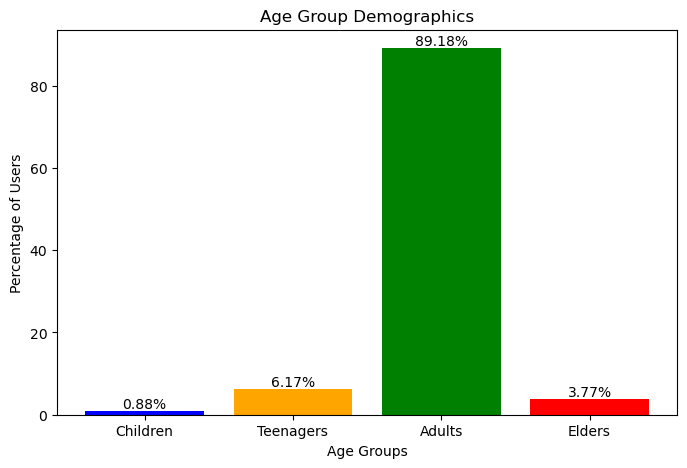

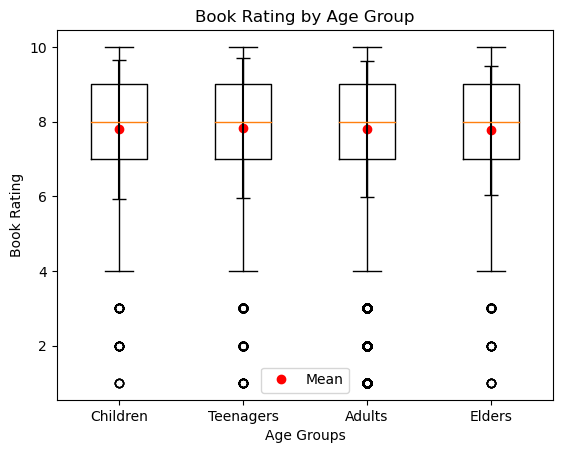

In [91]:
#calculate the averages per group
avg_children_rating = children_ratings['Book-Rating'].mean()
avg_teenager_rating = teenager_ratings['Book-Rating'].mean()
avg_adult_rating = adult_ratings['Book-Rating'].mean()
avg_elder_rating = elder_ratings['Book-Rating'].mean()

#calculate the stds per group
std_children_rating = children_ratings['Book-Rating'].std()
std_teenager_rating = teenager_ratings['Book-Rating'].std()
std_adult_rating = adult_ratings['Book-Rating'].std()
std_elder_rating = elder_ratings['Book-Rating'].std()

#calculate the highest, we could just see it tho xd
highest_rating_group = max(avg_children_rating, avg_teenager_rating, avg_adult_rating, avg_elder_rating)

print("Average Book Ratings by Children: " + str(round(avg_children_rating, 2)))
print("STD of Book Ratings by Children: " + str(round(std_children_rating, 2)))
print("Average Book Ratings by Teenagers: " + str(round(avg_teenager_rating, 2)))
print("STD of Book Ratings by Teenagers: " + str(round(std_teenager_rating, 2)))
print("Average Book Ratings by Adults: " + str(round(avg_adult_rating, 2)))
print("STD of Book Ratings by Adults: " + str(round(std_adult_rating, 2)))
print("Average Book Ratings by Elders: " + str(round(avg_elder_rating, 2)))
print("STD of Book Ratings by Elders: " + str(round(std_elder_rating, 2)))
print("Most Optimistic Group: Children with an average rating of " + str(round(avg_children_rating, 2)))

#bar chart
labels_bar = ['Children', 'Teenagers', 'Adults', 'Elders']

# Calculate the percentages for each age group
percentages = [value / total_users * 100 for value in [n_children, n_teeneagers, n_adults, n_elders]]

# Plot the bar graph with percentages
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels_bar, percentages, color=['blue', 'orange', 'green', 'red'], linewidth=1.2)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Percentage of Users')
ax.set_title('Age Group Demographics')

# Add percentage labels to the bars
for i in range(len(percentages)):
    ax.text(x=i, y=percentages[i], s=f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

# Create a list of ratings for each age group for box plot
ratings = [children_ratings['Book-Rating'], teenager_ratings['Book-Rating'], adult_ratings['Book-Rating'], elder_ratings['Book-Rating']]

# Calculate the mean and standard deviation for each age group
means = [group.mean() for group in ratings]
stds = [group.std() for group in ratings]

# Define the labels for the age groups
labels_box = ['Children', 'Teenagers', 'Adults', 'Elders']

# Plot the box plots
fig, ax = plt.subplots()
ax.boxplot(ratings)
ax.set_xticklabels(labels_box)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Book Rating')
ax.set_title('Book Rating by Age Group')

# Add mean markers to the plot
ax.plot(range(1, len(means) + 1), means, 'ro', label='Mean')
ax.errorbar(range(1, len(means) + 1), means, yerr=stds, fmt='none', color='black', capsize=5)

# Add a legend
ax.legend()

plt.show()

## Publisher Focus per Age Group

In [92]:
#extract the reviews per group
children_reviews_nr = children_ratings['Publisher'].value_counts()
teenager_reviews_nr = teenager_ratings['Publisher'].value_counts()
adult_reviews_nr = adult_ratings['Publisher'].value_counts()
elder_reviews_nr = elder_ratings['Publisher'].value_counts()

#max them to get the tops
focus_publisher_children = children_reviews_nr.idxmax()
focus_publisher_teenager = teenager_reviews_nr.idxmax()
focus_publisher_adult = adult_reviews_nr.idxmax()
focus_publisher_elder = elder_reviews_nr.idxmax()

print("Publisher with the Most Reviews for Children: " + focus_publisher_children)
print("Publisher with the Most Reviews for Teenagers: " + focus_publisher_teenager)
print("Publisher with the Most Reviews for Adults: " + focus_publisher_adult)
print("Publisher with the Most Reviews for Elders: " + focus_publisher_elder)

Publisher with the Most Reviews for Children: Scholastic
Publisher with the Most Reviews for Teenagers: Scholastic
Publisher with the Most Reviews for Adults: Ballantine Books
Publisher with the Most Reviews for Elders: Warner Books


## Book-Title wordcloud

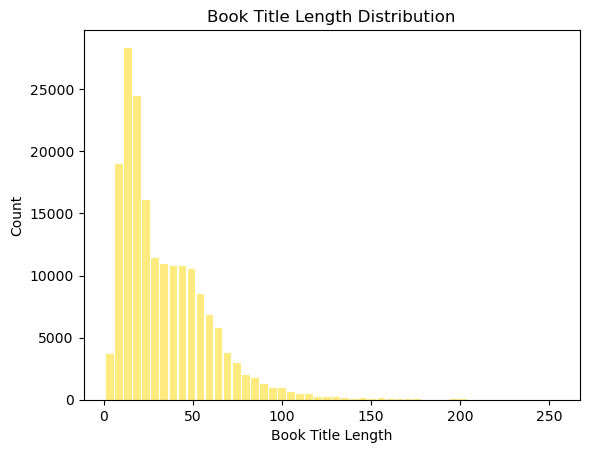

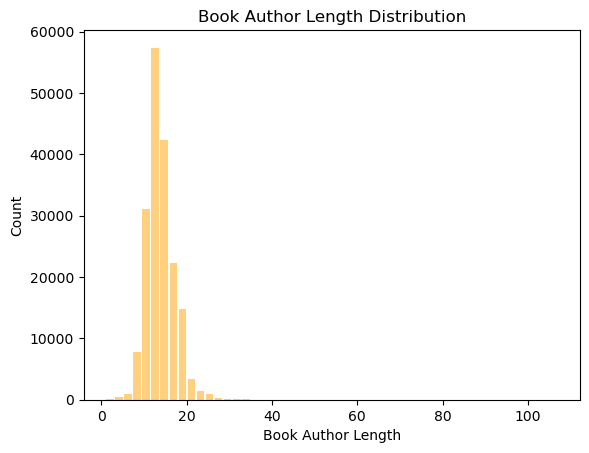

In [93]:
# Book Title Length Analysis
book_title_length = finaldf['Book-Title'].str.len()

plt.hist(book_title_length, bins=50, color='#FFD700', alpha=0.5, rwidth=0.85)
plt.xlabel('Book Title Length')
plt.ylabel('Count')
plt.title('Book Title Length Distribution')
plt.show()

# Book Author Length Analysis
book_author_length = finaldf['Book-Author'].str.len()

plt.hist(book_author_length, bins=50, color='#FFA500', alpha=0.5, rwidth=0.85)
plt.xlabel('Book Author Length')
plt.ylabel('Count')
plt.title('Book Author Length Distribution')
plt.show()

In [94]:
# Book Title Word Cloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba
from PIL import Image

text = " ".join(finaldf['Book-Title'])
cut_text = " ".join(jieba.cut(text))

stopwords = set(STOPWORDS)

wc = WordCloud(
    background_color="white",
    max_words=200,
    stopwords=stopwords,
    max_font_size=150,
    random_state=42,
    width=1000, height=860, margin=2,
)
wc.generate(cut_text)

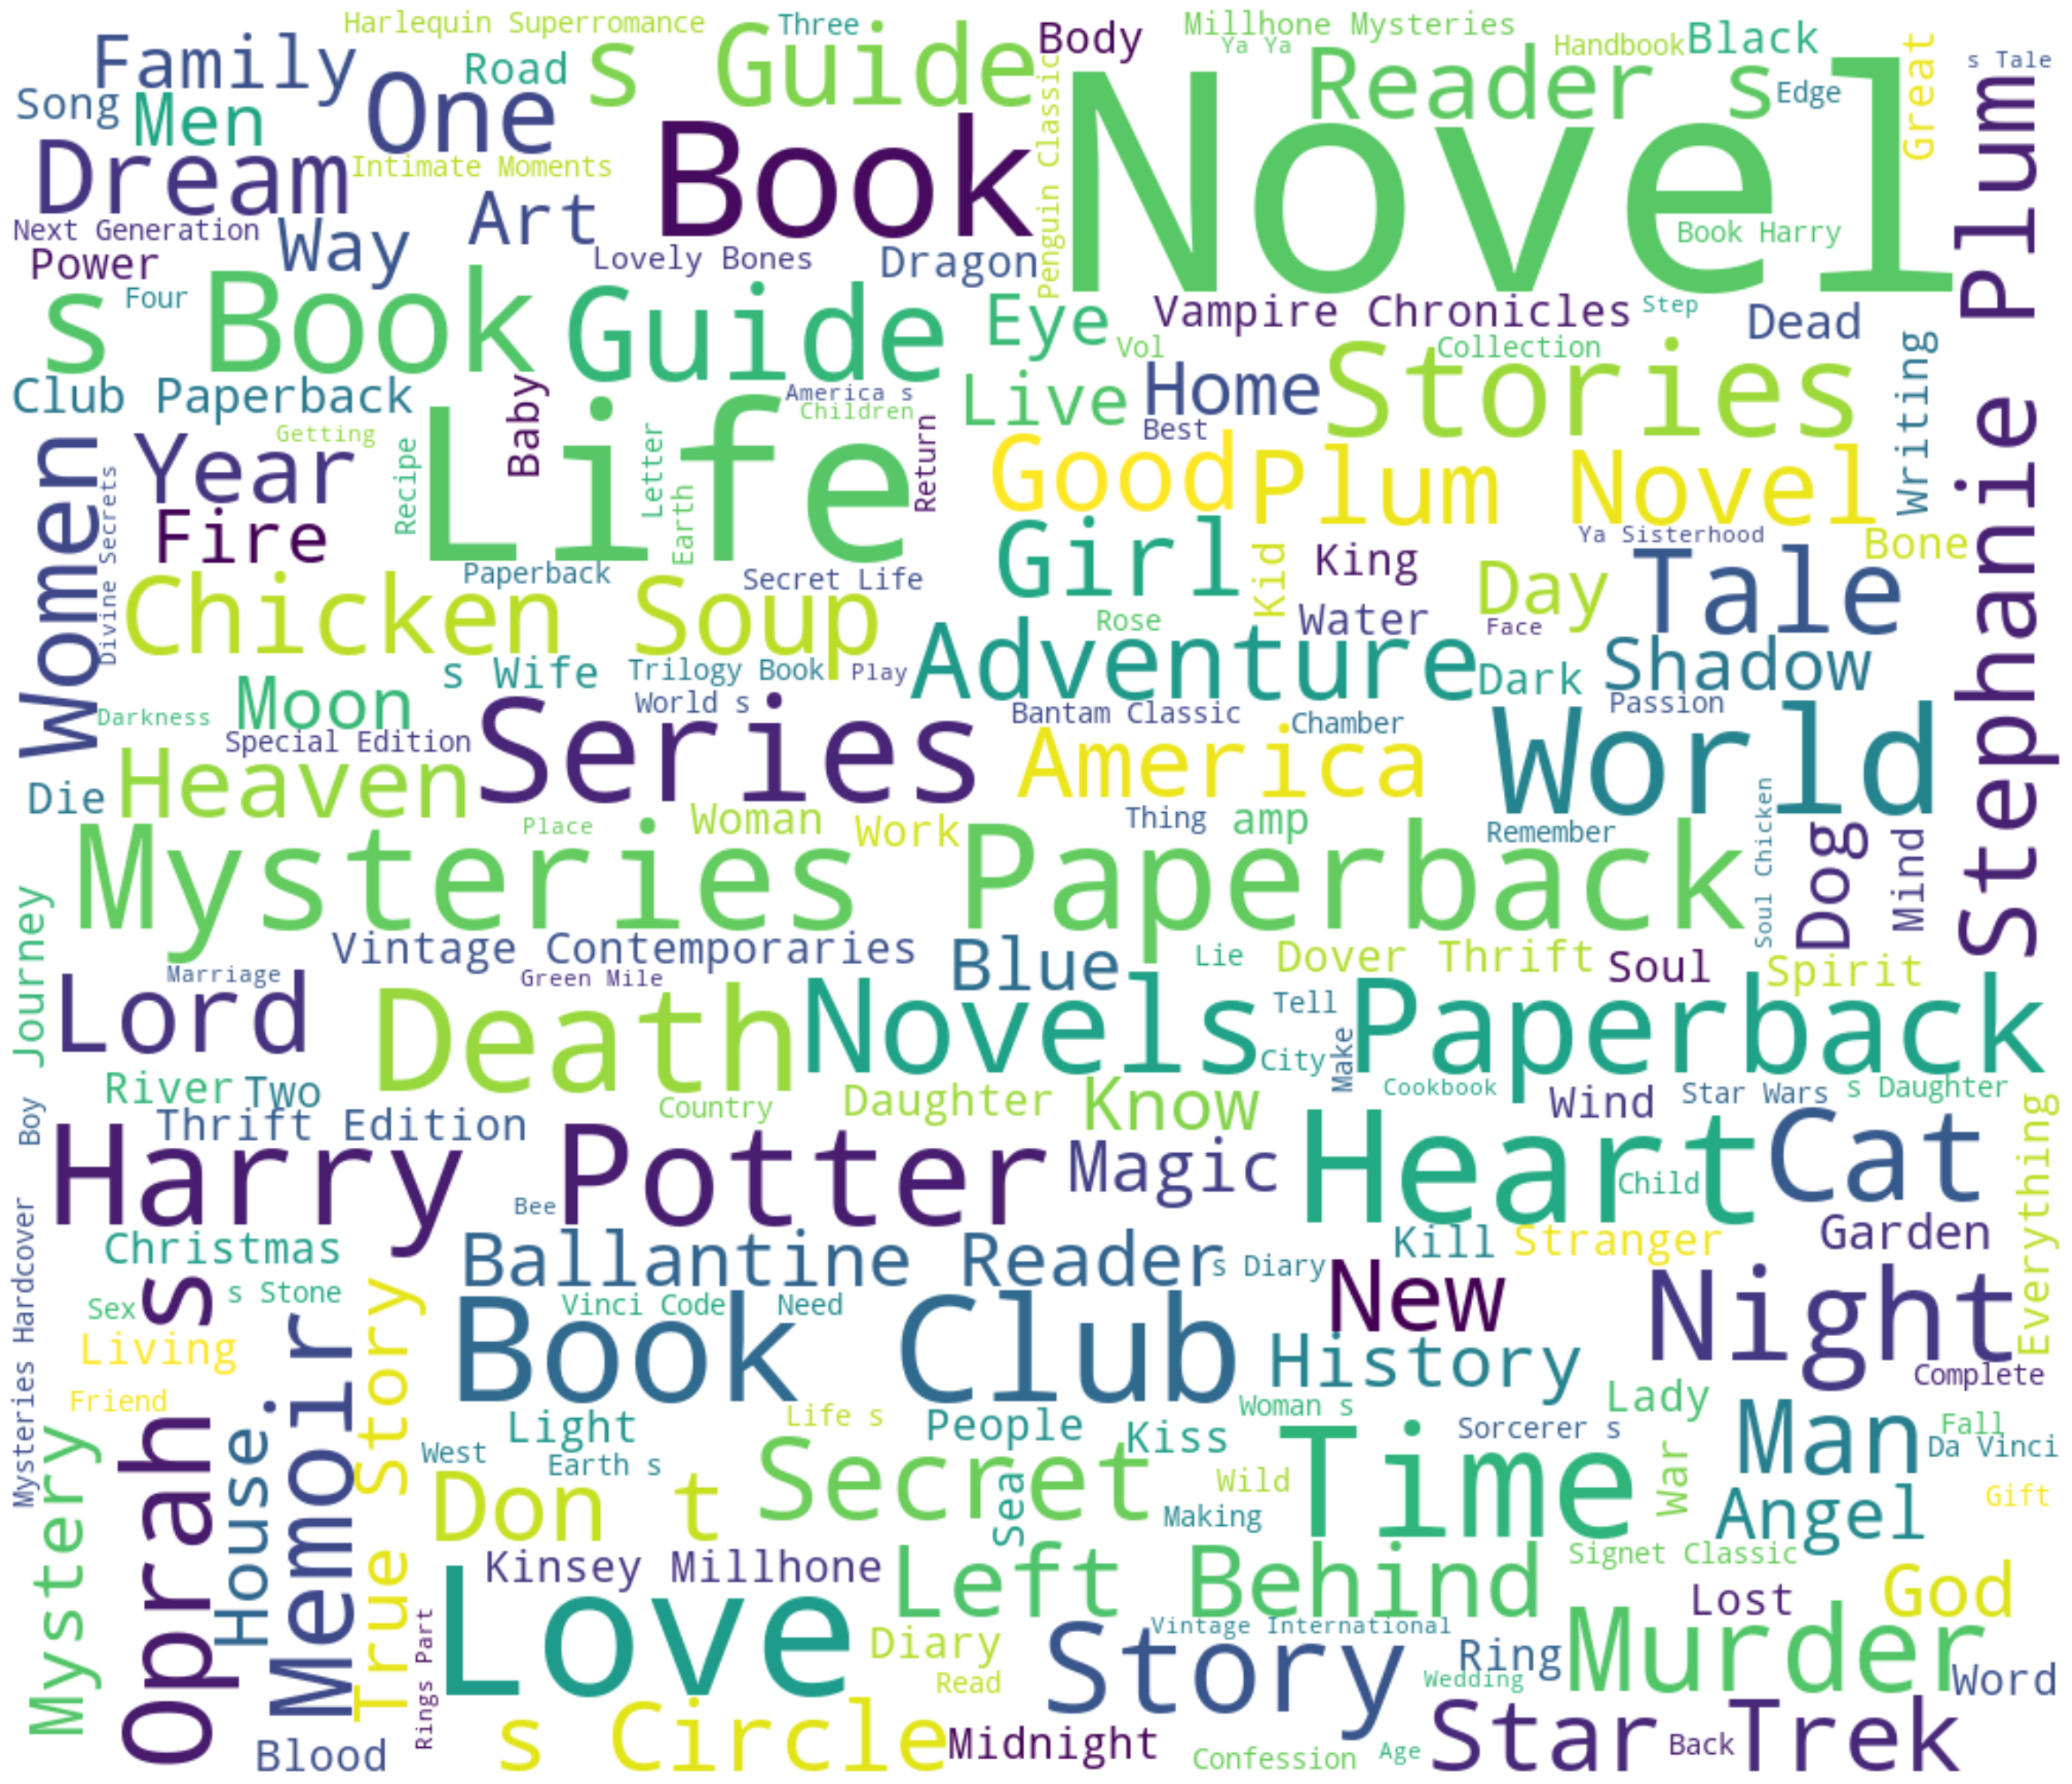

In [95]:
# Display Word Cloud
fig = plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Correlation Analysis

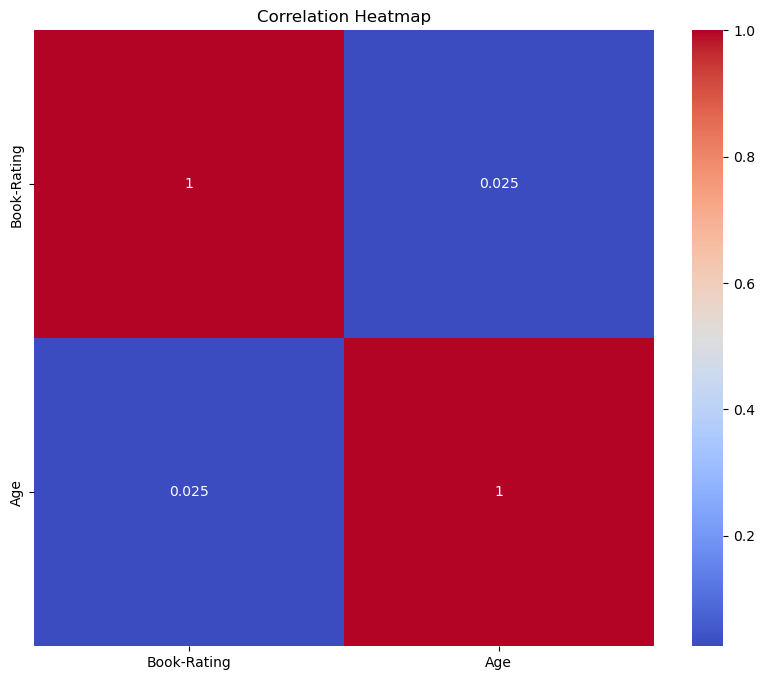

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a Copy for Encoding
encoded_df = finaldf[['Book-Rating', 'Age']]


# # Label Encoding Categorical Variables
# label_encoder = LabelEncoder()
# encoded_df['Encoded_Location'] = label_encoder.fit_transform(finaldf['Location'])

# Calculate Correlation Matrix
correlation_matrix = encoded_df.corr()

# Draw Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

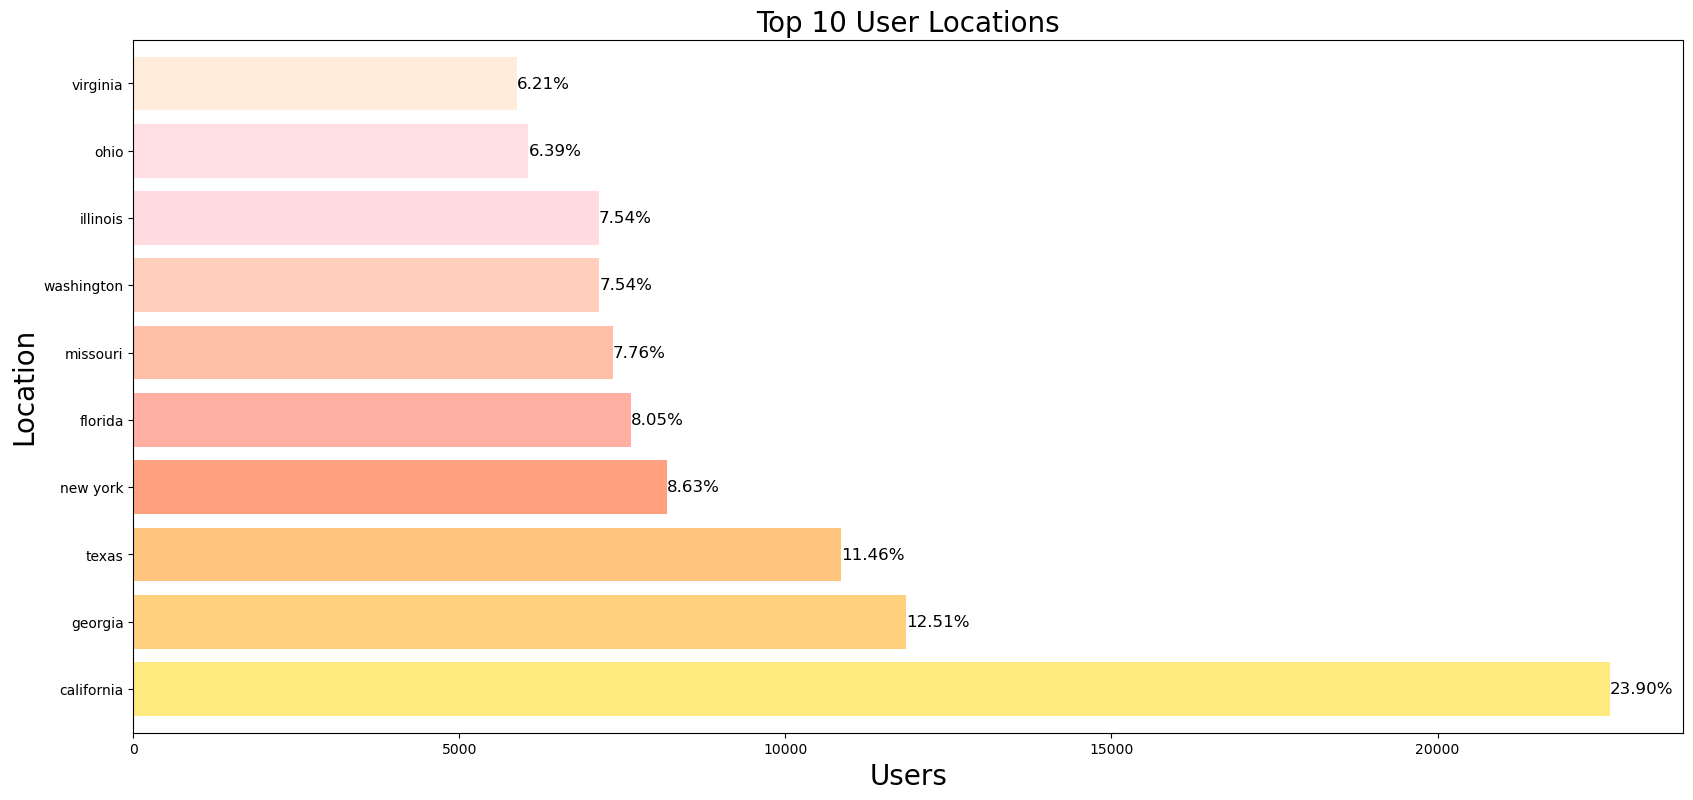

In [108]:
# Count the Number of Users by Location
location_counts = finaldf['Location'].value_counts().head(10)

# Calculate the total count
total_count = location_counts.sum()

# Calculate the percentages for each location
percentages = [(count / total_count) * 100 for count in location_counts]

# Draw Bar Chart with Percentages
plt.figure(figsize=(20, 9))
colors = ['#FFD700', '#FFA500', '#FF8C00', '#FF4500', '#FF6347', '#FF7F50', '#FFA07A', '#FFB6C1', '#FFC0CB', '#FFDAB9']
location_counts.plot(kind='barh', color=colors, alpha=0.5, width=0.8)
plt.xlabel('Users', fontsize=20)
plt.ylabel('Location', fontsize=20)
plt.title('Top 10 User Locations', fontsize=20)

# Add percentage labels to the bars
for i, count in enumerate(location_counts):
    percentage = percentages[i]
    plt.text(count, i, f'{percentage:.2f}%', ha='left', va='center', fontsize=12)

plt.xticks(rotation=0)
plt.show()


## AVG Ratings of Top 10 Locations

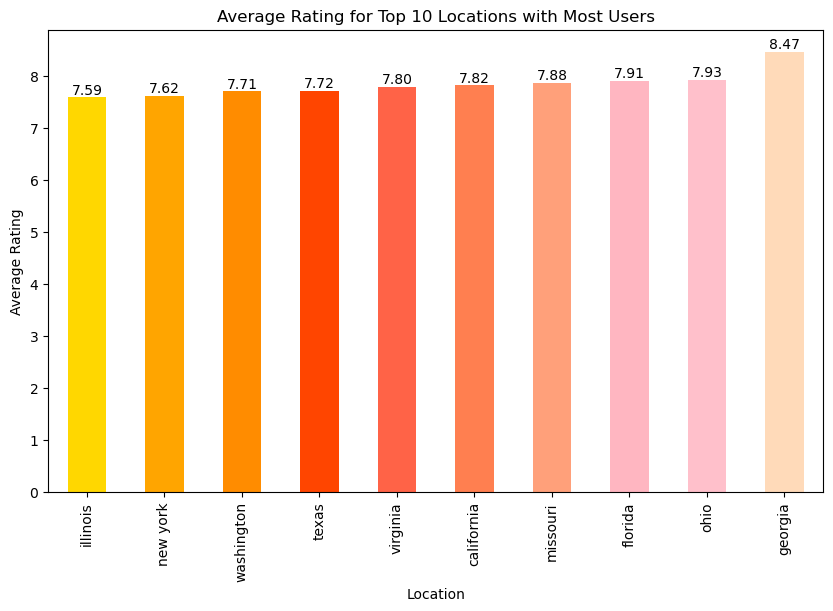

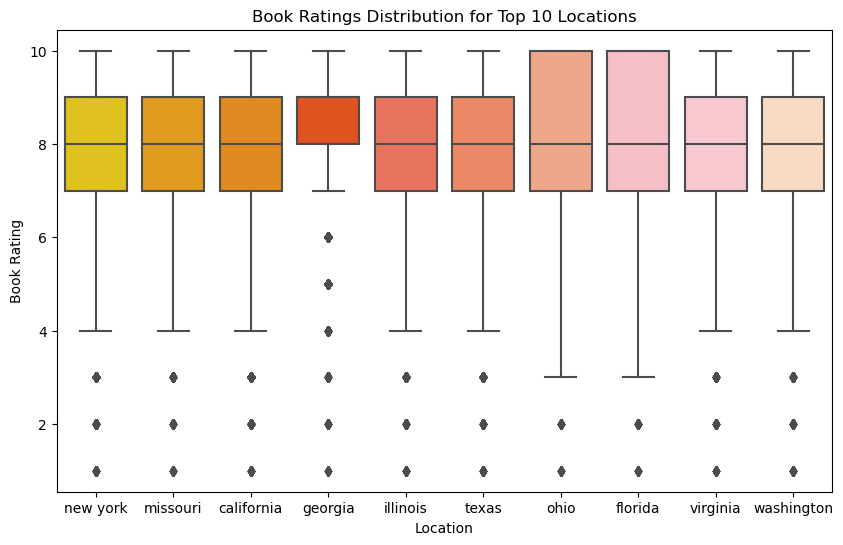

In [98]:
# Define the colors for the bar chart
colors = ['#FFD700', '#FFA500', '#FF8C00', '#FF4500', '#FF6347', '#FF7F50', '#FFA07A', '#FFB6C1', '#FFC0CB', '#FFDAB9']

# Get the top 10 locations with the most users
top_10_locations = finaldf['Location'].value_counts().nlargest(10).index

# Calculate the average book rating for the top 10 locations
avg_ratings = finaldf[finaldf['Location'].isin(top_10_locations)].groupby('Location')['Book-Rating'].mean().sort_values()

# Plot the bar chart for average ratings
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color=colors)
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.title('Average Rating for Top 10 Locations with Most Users')

# Add value labels to the bars
for i, v in enumerate(avg_ratings):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Create a box plot for each location
plt.figure(figsize=(10, 6))
sns.boxplot(data=finaldf[finaldf['Location'].isin(top_10_locations)], x='Location', y='Book-Rating', palette=colors)
plt.xlabel('Location')
plt.ylabel('Book Rating')
plt.title('Book Ratings Distribution for Top 10 Locations')

plt.show()


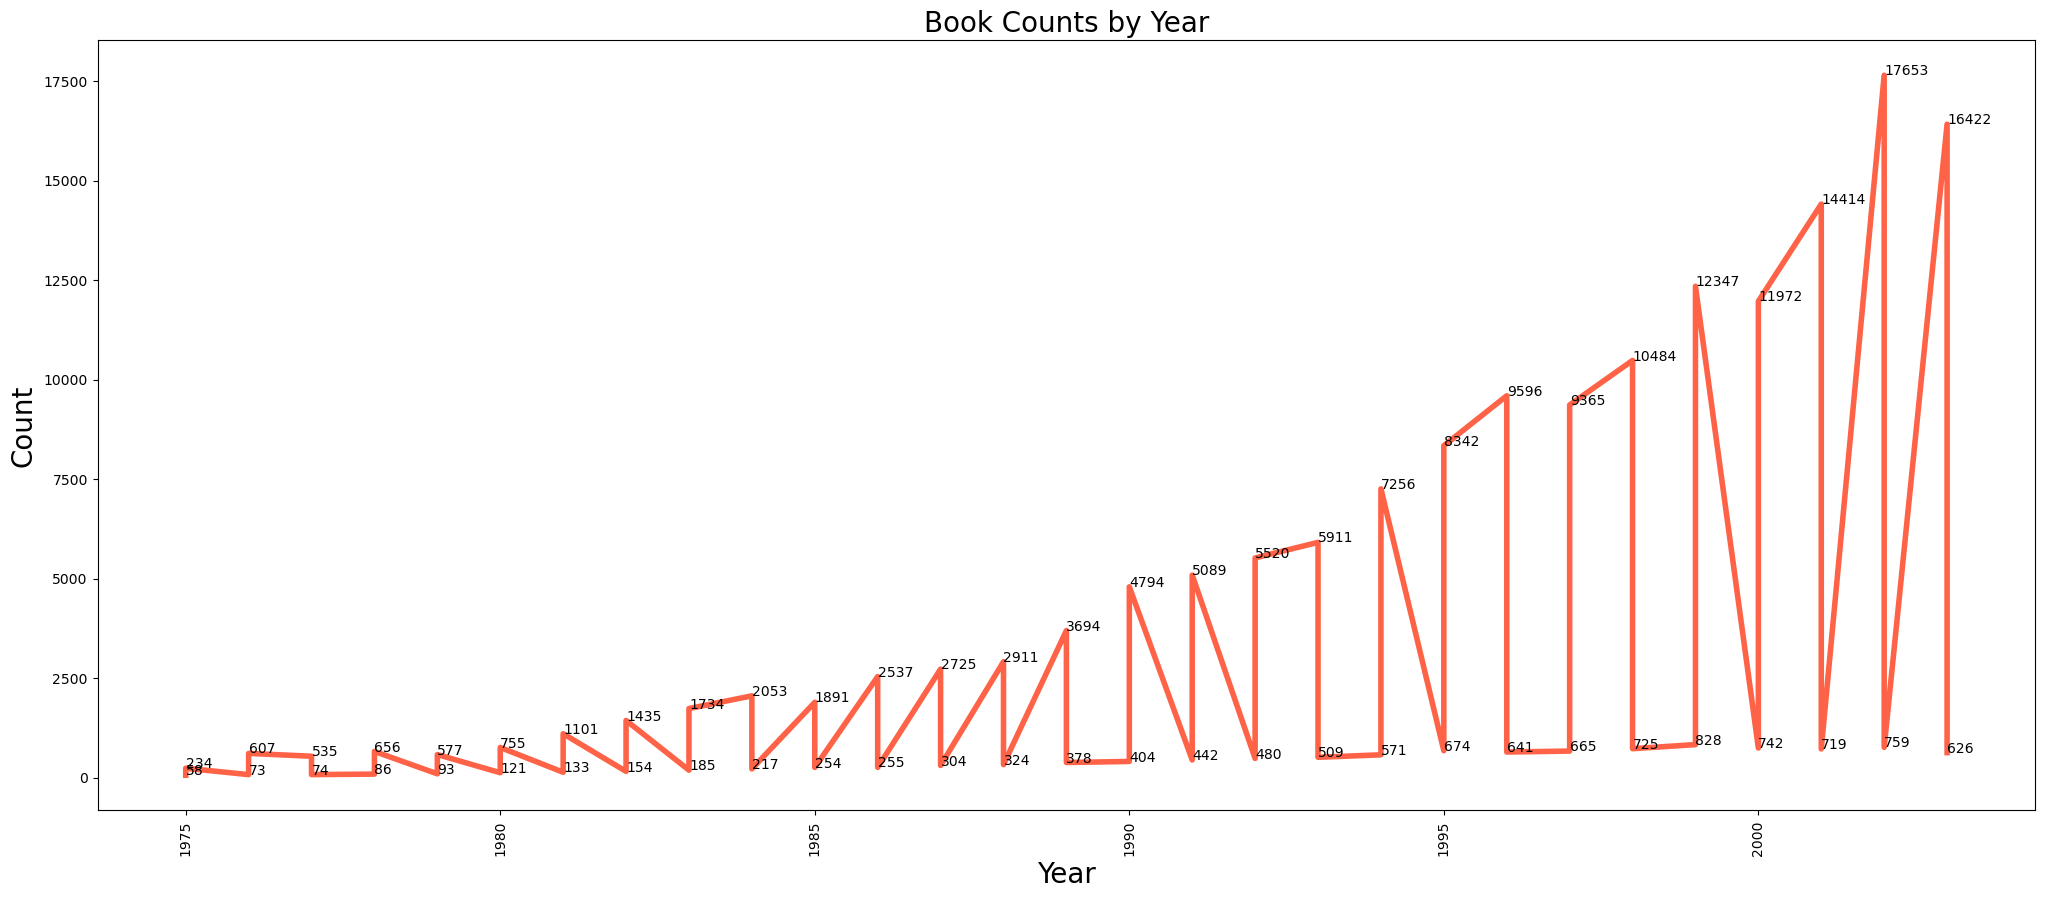

In [99]:
# Count the Number of Books by Year
year_counts = finaldf['Year-Of-Publication'].value_counts()

# Remove Missing Values
year_counts = year_counts.dropna()

# Convert Year to Integer
year_counts.index = pd.to_numeric(year_counts.index, errors='coerce', downcast='integer')
year_counts = year_counts.dropna()

# Sort by Year
year_counts = year_counts.sort_index()
year_counts = year_counts[(year_counts.index >= 1975) & (year_counts.index <= 2003)]

# Draw Line Chart
plt.figure(figsize=(25, 10))
plt.plot(year_counts.index, year_counts.values, color='#FF6347',linewidth=4.0)
for i in range(len(year_counts.index)):
    plt.annotate(year_counts.values[i], (year_counts.index[i], year_counts.values[i]))

plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Book Counts by Year', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Prediction and Classification Models

In this section we will try to fit some models to the data in order to perform predictions in some cases, but also classification.

In [109]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

## Predicting Book Rating

In [110]:
# Predicting Book Ratings Using Machine Learning Algorithms
# 1. Select Features
new_df = finaldf[['Age', 'Book-Rating']]
x = new_df[['Age']]
y = new_df['Book-Rating']

# Data Preprocessing
# 1. Handling Missing Values
x = x.fillna(x.mean())
y = y.fillna(y.mean())

# 2. Feature Encoding
le = LabelEncoder()
x['Age'] = le.fit_transform(x['Age'])

# Splitting the Dataset into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y)

# 2. Select Model
# Decision Tree
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(x_train, y_train)

# Random Forest
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# 3. Evaluate Model
predicted_ratings_tree = tree_model.predict(x_test)
predicted_ratings_forest = forest_model.predict(x_test)
predicted_ratings_linear = linear_model.predict(x_test)
tree_mae = mean_absolute_error(y_test, predicted_ratings_tree)
forest_mae = mean_absolute_error(y_test, predicted_ratings_forest)
linear_mae = mean_absolute_error(y_test, predicted_ratings_linear)
print("Decision Tree MAE: " + str(tree_mae))
print("Random Forest MAE: " + str(forest_mae))
print("Linear Regression MAE: " + str(linear_mae))

Decision Tree MAE: 1.4486167700893975
Random Forest MAE: 1.4485926080642508
Linear Regression MAE: 1.4600071892737214


In [102]:
# Split the dataset into features (X) and target (y)
df = finaldf.copy()
selected_columns = ['Book-Author', 'Year-Of-Publication', 'Publisher', 'Location', 'City', 'Age', 'Book-Rating']
df = df[selected_columns]

# Handle missing values (e.g., fill with mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Book-Rating', axis=1)
y = df['Book-Rating']

# Perform feature scaling and encoding for categorical variables
numeric_features = ['Year-Of-Publication', 'Age']
categorical_features = ['Book-Author', 'Publisher', 'Location', 'City']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Define the hyperparameter values for tuning
n_estimators_values = [100, 200, 300]
max_depth_values = [10, 15, 20]
min_samples_split_values = [2, 5, 10]

best_mse = float('inf')
best_params = {}

# Iterate over hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Train the model with current hyperparameters
            rf_model.set_params(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
            rf_model.fit(X_train, y_train)
            
            # Make predictions on the test set
            y_pred = rf_model.predict(X_test)
            
            # Calculate the mean squared error
            mse = mean_squared_error(y_test, y_pred)
            
            # Check if current model has lower MSE than the previous best model
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split
                }

# Train the final model with the best hyperparameters
rf_model.set_params(**best_params)
rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

KeyboardInterrupt: 

## KNN Classifier

In [104]:
knndf = finaldf.copy()
# Construct Features, Including User's Age, Gender, Location, Book's Author, Publisher, Year, and Rating
knndf['Year-Of-Publication'] = knndf['Year-Of-Publication'].astype('int')
knndf['Age_group'] = knndf['Age_group'].astype('int')
knndf['Book-Author'] = knndf['Book-Author'].astype('category')
knndf['Publisher'] = knndf['Publisher'].astype('category')
knndf['Location'] = knndf['Location'].astype('category')
knndf['City'] = knndf['City'].astype('category')
knndf.describe()

KeyError: 'Age_group'

In [105]:
le = LabelEncoder()
knndf['Book-Author'] = le.fit_transform(knndf['Book-Author'])
knndf['Publisher'] = le.fit_transform(knndf['Publisher'])
knndf['Location'] = le.fit_transform(knndf['Location'])
knndf['City'] = le.fit_transform(knndf['City'])
knndf.describe()

,User-ID,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,City
count,183578.000000,183578.000000,183578.000000,183578.000000,183578.000000,183578.000000,183578.000000,183578.000000
mean,137508.978843,7.805216,17983.386659,1994.623533,3097.860305,58.254486,37.536513,2661.161114
std,79166.340741,1.814005,10456.629900,50.470124,1856.904352,34.916906,12.399626,1526.494232
min,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69971.000000,7.000000,8858.000000,1993.000000,1481.000000,28.000000,29.000000,1307.000000
50%,133738.000000,8.000000,17802.000000,1998.000000,3116.000000,54.000000,36.000000,2819.000000
75%,207259.000000,9.000000,26753.000000,2001.000000,4798.000000,89.000000,47.000000,3968.000000
max,278851.000000,10.000000,36050.000000,2050.000000,6166.000000,125.000000,79.000000,5379.000000


In [106]:
train, test = train_test_split(knndf, test_size=0.2, random_state=42)
print('Size of the Training Set:', train.shape[0], 'Size of the Test Set:', test.shape[0])
# Rating Prediction
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[['Age', 'Book-Author', 'Publisher', 'Location', 'City']], train['Book-Rating'])
pred = knn.predict(test[['Age', 'Book-Author', 'Publisher', 'Location', 'City']])
print('Accuracy:', accuracy_score(test['Book-Rating'], pred))
print('Mean Squared Error:', mean_squared_error(test['Book-Rating'], pred))
print('Mean Absolute Error:', mean_absolute_error(test['Book-Rating'], pred))
print('R2:', r2_score(test['Book-Rating'], pred))
print('Report:', classification_report(test['Book-Rating'], pred))

plt.figure(figsize=(20, 10))
plt.plot(test['Book-Rating'].values[:100], label='true')
plt.plot(pred[:100], label='pred')
plt.legend()
plt.show()

Size of the Training Set: 146862 Size of the Test Set: 36716
Accuracy: 0.23654537531321496
Mean Squared Error: 5.089061989323456
Mean Absolute Error: 1.6919054363220394
R2: -0.540636477014788


NameError: name 'classification_report' is not defined

In [107]:
#Training Results are not good, Remove 'Author', Keep Other Features Unchanged
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[['Age', 'Publisher', 'Location', 'City']], train['Book-Rating'])
pred = knn.predict(test[['Age', 'Publisher', 'Location', 'City']])
print('Accuracy: ', accuracy_score(test['Book-Rating'], pred))
print('Mean Squared Error: ', mean_squared_error(test['Book-Rating'], pred))
print('Mean Absolute Error: ', mean_absolute_error(test['Book-Rating'], pred))
print('R2: ', r2_score(test['Book-Rating'], pred))
print('Report: ', classification_report(test['Book-Rating'], pred))

plt.figure(figsize=(20, 10))
plt.plot(test['Book-Rating'].values[:100], label='true')
plt.plot(pred[:100], label='pred')
plt.legend()
plt.show()

Accuracy:  0.27091731125394924
Mean Squared Error:  4.772878309184007
Mean Absolute Error:  1.5951901078548862
R2:  -0.4449166543673988


NameError: name 'classification_report' is not defined

In [ ]:
# Delete Locations with Less Than 500 Instances
knndf = knndf[knndf['Location'].isin(knndf['Location'].value_counts()[knndf['Location'].value_counts() > 500].index)]
knndf = knndf[knndf['City'].isin(knndf['City'].value_counts()[knndf['City'].value_counts() > 500].index)]
knndf.describe()

# Resplit the Dataset
train, test = train_test_split(knndf, test_size=0.2, random_state=42)
print('Size of the Training Set:', train.shape[0], 'Size of the Test Set:', test.shape[0])

# Rating Prediction
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[['Age', 'Publisher', 'Location', 'City']], train['Book-Rating'])
pred = knn.predict(test[['Age', 'Publisher', 'Location', 'City']])
print('Accuracy:', accuracy_score(test['Book-Rating'], pred))
print('Mean Squared Error:', mean_squared_error(test['Book-Rating'], pred))
print('Mean Absolute Error:', mean_absolute_error(test['Book-Rating'], pred))
print('R2:', r2_score(test['Book-Rating'], pred))
print('Report:', classification_report(test['Book-Rating'], pred))

plt.figure(figsize=(20, 10))
plt.plot(test['Book-Rating'].values[:100], label='true')
plt.plot(pred[:100], label='pred')
plt.legend()
plt.show()


In [ ]:
# Delete Authors with Less Than 100 Instances
knndf = knndf[knndf['Book-Author'].isin(knndf['Book-Author'].value_counts()[knndf['Book-Author'].value_counts() > 100].index)]
knndf.describe()

train, test = train_test_split(knndf, test_size=0.2, random_state=42)
print('Size of the Training Set:', train.shape[0], 'Size of the Test Set:', test.shape[0])

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[['Age', 'Publisher', 'Location', 'City']], train['Book-Rating'])
pred = knn.predict(test[['Age', 'Publisher', 'Location', 'City']])
print('Accuracy:', accuracy_score(test['Book-Rating'], pred))
print('Mean Squared Error:', mean_squared_error(test['Book-Rating'], pred))
print('Mean Absolute Error:', mean_absolute_error(test['Book-Rating'], pred))
print('R2:', r2_score(test['Book-Rating'], pred))
print('Report:', classification_report(test['Book-Rating'], pred))

plt.figure(figsize=(20, 10))
plt.plot(test['Book-Rating'].values[:100], label='true')
plt.plot(pred[:100], label='pred')
plt.legend()
plt.show()


In [ ]:
# Delete Ratings Below 5
knndf = knndf[knndf['Book-Rating'] > 5]
knndf.describe()

train, test = train_test_split(knndf, test_size=0.2, random_state=42)
print('Size of the Training Set:', train.shape[0], 'Size of the Test Set:', test.shape[0])

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train[['Age', 'Publisher', 'Location']], train['Book-Rating'])
pred = knn.predict(test[['Age', 'Publisher', 'Location']])
print('Accuracy:', accuracy_score(test['Book-Rating'], pred))
print('Mean Squared Error:', mean_squared_error(test['Book-Rating'], pred))
print('Mean Absolute Error:', mean_absolute_error(test['Book-Rating'], pred))
print('R2:', r2_score(test['Book-Rating'], pred))
print('Report:', classification_report(test['Book-Rating'], pred))

plt.figure(figsize=(20, 10))
plt.plot(test['Book-Rating'].values[:100], label='true')
plt.plot(pred[:100], label='pred')
plt.legend()
plt.show()


## Analysis
We can see that for some columns with particularly small amounts of data, we can directly delete them because these columns do not help our analysis. On the contrary, they can lead to overfitting of the model.

We have made several deletions:
- Deleted some columns with a lot of missing values
- Deleted some columns that are not helpful for analysis, such as age
- Deleted columns with too little data, such as authors with fewer than 100 instances.

For rating prediction, the data is too mixed, and there are too few features. It's best to add some features, such as the user's age, gender, occupation, region, etc. Then the book's sales volume, category, word count, number of reviews and other features.

For recommendation systems, these are also good features, but we can add some other features, such as the user's purchase history, the user's rating history, the user's review history, etc.

## Testing Scrappers

In [ ]:
def get_genre(soup):
    genre = ""
    genre_tag = soup.select_one('a[href*="/genres/"]')
    if genre_tag:
        genre = genre_tag.text
    return genre


import requests
from bs4 import BeautifulSoup

# Prepare a list of book ISBNs
book_isbns = booksdf['ISBN'].tolist()

# Initialize an empty list to store the genres, uncomment this if first time 
# genres = []

In [ ]:
# # Scrape the genres for each book ISBN
# for isbn in book_isbns[13886:]:
#   # Construct the URL for the book's page on Goodreads
#     url = f'https://www.goodreads.com/book/isbn/{isbn}'

#     # Send a GET request to the URL
#     response = requests.get(url)

#     # Create a BeautifulSoup object to parse the HTML content
#     soup = BeautifulSoup(response.content, 'html.parser')
# #     print(soup)
#     genre = get_genre(soup)
#     genres.append(genre)

In [ ]:
print(len(book_isbns))